In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
plt.rcParams['figure.figsize'] = [16, 6]

# Central Limit Theorem

Suppose that we have the CTMC $X(t)$ that, at the times of a Poisson process of rate 1,
moves a distance of $\pm Z$, with the sign chosen uniformly and $Z \sim \text{Geometric(p)}$,
i.e.,
$$ \mathbb{P}\{ Z = k \}  = \frac{(1-p)^k}{p} \qquad k \ge 0 .$$
Since $\text{var}[Z] = (1-p) / p^2$, we expect that
$$
   \frac{1}{\sqrt{N}} X(Nt) \approx N(0, t (1-p) / p^2) .
$$

## Theoretical calculations:

Work out $G$ and do linear algebra to find transition probabilities, etcetera.
We'll do this on $[0, L]$, so $G_{xy}$ is the rate of jumping from $x$ to $y$, for $0 \le x, y \le L$.

In [16]:
def geometric_prob(k, p):
    return (1-p)**k * p

L = 100
p = 0.3
max_jump = int(np.ceil(5/p))
assert(abs((np.sum(geometric_prob(np.arange(max_jump), p))) - 1.0) < 1e-2)

G = np.zeros((L+1, L+1))
for x in range(L+1):
    for k in range(1, max_jump):
        gprob = geometric_prob(k, p)
        G[x,x] -= 2*gprob
        if x+k <= L:
            G[x, x+k] = gprob
        if x-k >= 0:
            G[x, x-k] = gprob

Let $\tau$ be the first hitting time of $\{0, L\}$ and
let's compute 
$$q(t; x, y) = \mathbb{P}\{X(t) = y \text{ and } \tau > t| X(0) = x\},$$
i.e., the transition probabilities for the chain that is *absorbed* on the boundaries $0$ and $L$.
This is given by
$$ q(t; x, y) = \exp(tG)_{xy} , $$
where that's a matrix exponential, and $G$ is the $[0,L]$-submatrix that I've computed above.

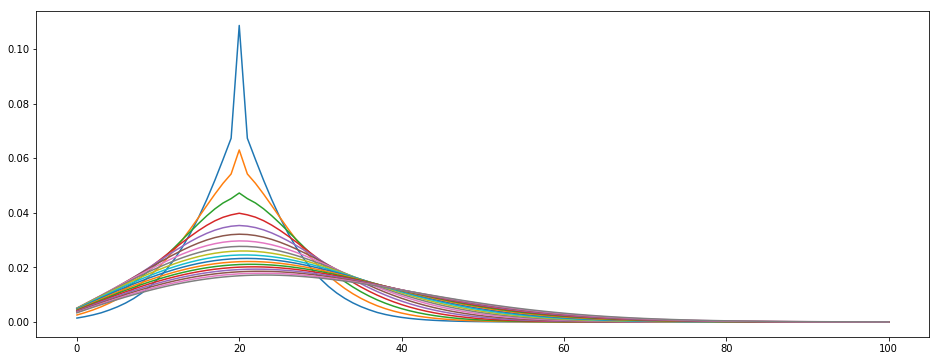

<Figure size 1152x1152 with 0 Axes>

In [36]:
import scipy.sparse.linalg

def qprob(t, x, G):
    # will return a vector of probabilities for each possible ending location
    # we want the vector (delta_x) exp(tG), whree delta_x is the vector with a 1 at location x and 0 otherwise
    delta_x = np.zeros(L+1)
    delta_x[x] = 1
    return scipy.sparse.linalg.expm_multiply(t * G.T, delta_x)

fig, ax = plt.subplots()
plt.figure(figsize=(16,16))

tvals = np.arange(2, 20)
for t in tvals:
    q = qprob(t, 20, G)
    ax.plot(q)



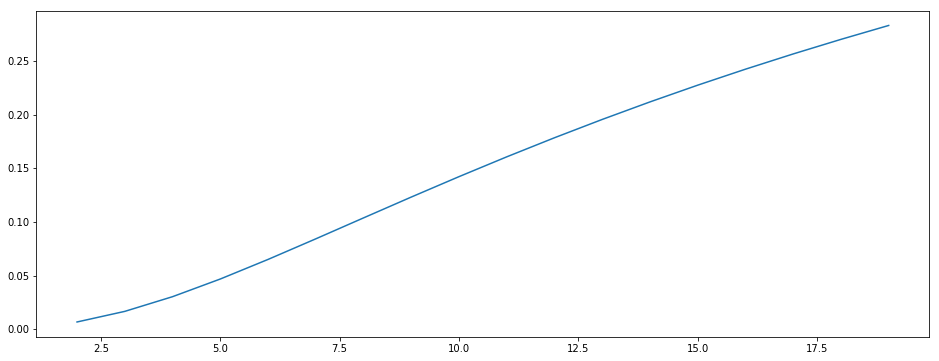

In [37]:
# plot probability of having hit the boundary so far:
qsum = np.array([1.0 - np.sum(qprob(t, 20, G)) for t in tvals])
fig, ax = plt.subplots()
ax.plot(tvals, qsum)

Next, we could compare that last thing to the solution to hitting probabilities: $Gf(x) = -1$...